# [利用logging模块轻松地进行Python日志记录](https://juejin.im/post/6844903616046694413)

- 为什么日志记录非常重要
- 日志记录的流程是怎样的
- 怎样来进行日志记录
- 怎样进行日志记录相关配置
- 日志记录使用常见误区

## 日志记录的重要性

在开发过程中，如果程序运行出现了问题，我们是可以使用我们自己的 Debug 工具来检测到到底是哪一步出现了问题，如果出现了问题的话，是很容易排查的。**但程序开发完成之后，我们会将它部署到生产环境中去，这时候代码相当于是在一个黑盒环境下运行的，我们只能看到其运行的效果，是不能直接看到代码运行过程中每一步的状态的。在这个环境下，运行过程中难免会在某个地方出现问题，甚至这个问题可能是我们开发过程中未曾遇到的问题，碰到这种情况应该怎么办？**

如果我们现在只能得知当前问题的现象，而没有其他任何信息的话，如果我们想要解决掉这个问题的话，那么只能根据问题的现象来试图复现一下，然后再一步步去调试，这恐怕是很难的，很大的概率上我们是无法精准地复现这个问题的，而且 Debug 的过程也会耗费巨多的时间，这样一旦生产环境上出现了问题，修复就会变得非常棘手。但这如果我们当时有做日志记录的话，不论是正常运行还是出现报错，都有相关的时间记录，状态记录，错误记录等，那么这样我们就可以方便地追踪到在当时的运行过程中出现了怎样的状况，从而可以快速排查问题。

因此，日志记录是非常有必要的，任何一款软件如果没有标准的日志记录，都不能算作一个合格的软件。作为开发者，我们需要重视并做好日志记录过程。

## 日志记录的流程框架

那么在 Python 中，怎样才能算作一个比较标准的日志记录过程呢？或许很多人会使用 print 语句输出一些运行信息，然后再在控制台观察，运行的时候再将输出重定向到文件输出流保存到文件中，这样其实是非常不规范的，**在 Python 中有一个标准的 logging 模块，我们可以使用它来进行标注的日志记录，利用它我们可以更方便地进行日志记录，同时还可以做更方便的级别区分以及一些额外日志信息的记录，如时间、运行模块信息等。**

接下来我们先了解一下日志记录流程的整体框架。

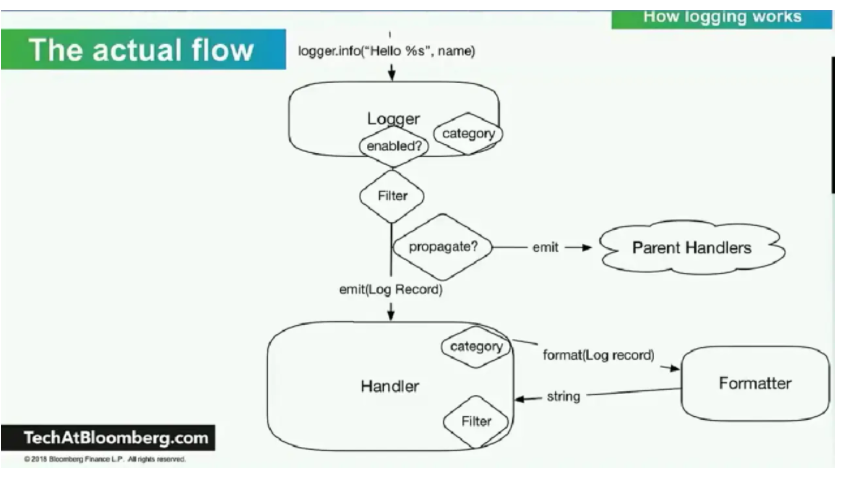

如图所示，整个日志记录的框架可以分为这么几个部分：

- Logger：即 Logger Main Class，是我们进行日志记录时创建的对象，我们可以调用它的方法传入日志模板和信息，来生成一条条日志记录，称作 Log Record。

- Log Record：就代指生成的一条条日志记录。

- Handler：即用来处理日志记录的类，它可以将 Log Record 输出到我们指定的日志位置和存储形式等，如我们可以指定将日志通过 FTP 协议记录到远程的服务器上，Handler 就会帮我们完成这些事情。

- Formatter：实际上生成的 Log Record 也是一个个对象，那么我们想要把它们保存成一条条我们想要的日志文本的话，就需要有一个格式化的过程，那么这个过程就由 Formatter 来完成，返回的就是日志字符串，然后传回给 Handler 来处理。

- Filter：另外保存日志的时候我们可能不需要全部保存，我们可能只需要保存我们想要的部分就可以了，所以保存前还需要进行一下过滤，留下我们想要的日志，如只保存某个级别的日志，或只保存包含某个关键字的日志等，那么这个过滤过程就交给 Filter 来完成。

- Parent Handler：Handler 之间可以存在分层关系，以使得不同 Handler 之间共享相同功能的代码。

以上就是整个 logging 模块的基本架构和对象功能，了解了之后我们详细来了解一下 logging 模块的用法。

## 日志记录的相关用法

总的来说 logging 模块相比 print 有这么几个优点：

- 可以在 logging 模块中设置日志等级，在不同的版本（如开发环境、生产环境）上通过设置不同的输出等级来记录对应的日志，非常灵活。
- print 的输出信息都会输出到标准输出流中，而 logging 模块就更加灵活，可以设置输出到任意位置，如写入文件、写入远程服务器等。
- logging 模块具有灵活的配置和格式化功能，如配置输出当前模块信息、运行时间等，相比 print 的字符串格式化更加方便易用。

下面我们初步来了解下 logging 模块的基本用法，先用一个实例来感受一下：

In [2]:
import logging

logging.basicConfig(level=logging.INFO, format='%(asctime)s - %(name)s - %(levelname)s - %(message)s')
logger = logging.getLogger(__name__)

logger.info('This is a log info')
logger.debug('Debugging')
logger.warning('Warning exists')
logger.info('Finish')

2020-08-12 10:36:13,721 - __main__ - INFO - This is a log info
2020-08-12 10:36:13,724 - __main__ - WARNING - Warning exists
2020-08-12 10:36:13,725 - __main__ - INFO - Finish


在这里我们首先引入了 logging 模块，然后进行了一下基本的配置，这里通过 basicConfig 配置了 level 信息和 format 信息，这里 level 配置为 INFO 信息，即只输出 INFO 级别的信息，另外这里指定了 format 格式的字符串，包括 asctime、name、levelname、message 四个内容，分别代表运行时间、模块名称、日志级别、日志内容，这样输出内容便是这四者组合而成的内容了，这就是 logging 的全局配置。

接下来声明了一个 Logger 对象，它就是日志输出的主类，调用对象的 info() 方法就可以输出 INFO 级别的日志信息，调用 debug() 方法就可以输出 DEBUG 级别的日志信息，非常方便。在初始化的时候我们传入了模块的名称，这里直接使用 `__name__` 来代替了，就是模块的名称，如果直接运行这个脚本的话就是` __main__`，如果是 import 的模块的话就是被引入模块的名称，这个变量在不同的模块中的名字是不同的，所以一般使用 `__name__` 来表示就好了，再接下来输出了四条日志信息，其中有两条 INFO、一条 WARNING、一条 DEBUG 信息。

可以看到输出结果一共有三条日志信息，每条日志都是对应了指定的格式化内容，另外我们发现 DEBUG 的信息是没有输出的，这是因为我们在全局配置的时候设置了输出为 INFO 级别，所以 DEBUG 级别的信息就被过滤掉了。

这时如果我们将输出的日志级别设置为 DEBUG，就可以看到 DEBUG 级别的日志输出了：

`logging.basicConfig(level=logging.DEBUG, format='%(asctime)s - %(name)s - %(levelname)s - %(message)s')`

In [1]:
import logging

logging.basicConfig(level=logging.DEBUG, format='%(asctime)s - %(name)s - %(levelname)s - %(message)s')
logger = logging.getLogger(__name__)

logger.info('This is a log info')
logger.debug('Debugging')
logger.warning('Warning exists')
logger.info('Finish')

2020-08-12 10:39:37,522 - __main__ - INFO - This is a log info
2020-08-12 10:39:37,525 - __main__ - DEBUG - Debugging
2020-08-12 10:39:37,526 - __main__ - WARNING - Warning exists
2020-08-12 10:39:37,526 - __main__ - INFO - Finish


由此可见，相比 print 来说，通过刚才的代码，我们既可以输出时间、模块名称，又可以输出不同级别的日志信息作区分并加以过滤，是不是灵活多了？

当然这只是 logging 模块的一小部分功能，接下来我们首先来全面了解一下 basicConfig 的参数都有哪些：

- filename：即日志输出的文件名，如果指定了这个信息之后，实际上会启用 FileHandler，而不再是 StreamHandler，这样日志信息便会输出到文件中了。
- filemode：这个是指定日志文件的写入方式，有两种形式，一种是 w，一种是 a，分别代表清除后写入和追加写入。
- format：指定日志信息的输出格式，即上文示例所示的参数，详细参数可以参考：docs.python.org/3/library/l…，部分参数如下所示：

    - %(levelno)s：打印日志级别的数值。
    - %(levelname)s：打印日志级别的名称。
    - %(pathname)s：打印当前执行程序的路径，其实就是sys.argv[0]。
    - %(filename)s：打印当前执行程序名。
    - %(funcName)s：打印日志的当前函数。
    - %(lineno)d：打印日志的当前行号。
    - %(asctime)s：打印日志的时间。
    - %(thread)d：打印线程ID。
    - %(threadName)s：打印线程名称。
    - %(process)d：打印进程ID。
    - %(processName)s：打印线程名称。
    - %(module)s：打印模块名称。
    - %(message)s：打印日志信息。

- datefmt：指定时间的输出格式。
- style：如果 format 参数指定了，这个参数就可以指定格式化时的占位符风格，如 %、{、$ 等。
- level：指定日志输出的类别，程序会输出大于等于此级别的信息。
- stream：在没有指定 filename 的时候会默认使用 StreamHandler，这时 stream 可以指定初始化的文件流。
- handlers：可以指定日志处理时所使用的 Handlers，必须是可迭代的。
